In [10]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
#from tensorflow import keras

In [11]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)              

In [14]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype = "float32")

In [15]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype = "float32")

In [16]:
opt = tf.keras.optimizers.SGD(learning_rate=1.4e-2, momentum=0.9)
model.compile(optimizer=opt,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(x_train, y_train_categorical, epochs=10,
                   validation_data=(x_test, y_test_categorical))

Epoch 1/10
1563/1563 [==============================] - 48s 30ms/step - loss: 1.9227 - accuracy: 0.2838 - val_loss: 1.4467 - val_accuracy: 0.4779
Epoch 2/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.3440 - accuracy: 0.5150 - val_loss: 1.2169 - val_accuracy: 0.5765
Epoch 3/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.1665 - accuracy: 0.5862 - val_loss: 1.1187 - val_accuracy: 0.6159
Epoch 4/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.0648 - accuracy: 0.6278 - val_loss: 1.0906 - val_accuracy: 0.6249
Epoch 5/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.9775 - accuracy: 0.6562 - val_loss: 1.1154 - val_accuracy: 0.6298
Epoch 6/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9271 - accuracy: 0.6759 - val_loss: 1.0563 - val_accuracy: 0.6468
Epoch 7/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.8633 - accuracy: 0.6954 - val_loss: 1.0639 -

313/313 - 3s - loss: 1.0765 - accuracy: 0.6447
1563/1563 - 12s - loss: 0.7473 - accuracy: 0.7390


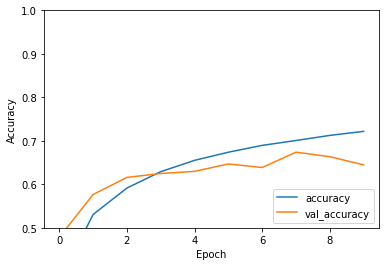

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(x_test, y_test_categorical, verbose=2)
train_loss, train_acc = model.evaluate(x_train, y_train_categorical, verbose=2)

In [19]:
print("test_loss=",test_loss)
print("test_acc=",test_acc)
print("train_loss=",train_loss)
print("train_acc=",train_acc)

test_loss= 1.076539158821106
test_acc= 0.6446999907493591
train_loss= 0.7472845315933228
train_acc= 0.7390000224113464
